In [1]:
import sympy as sm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import timeit

In [2]:
r0 = 2.5; q0 = (1/30000)
aC0 = 0.05; eC0 = 0.65; mC0 = 0.05; hC0 = 0.1
aP0 = 0.05; eP0 = 0.05; mP0 = 0.05; hP0 = 0.5 

u0 = np.array([8000, 900, 32, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
p

(2.5, 3.3333333333333335e-05, 0.05, 0.65, 0.1, 0.05, 0.05, 0.05, 0.05, 0.5)

In [3]:
Xr, X0, Ex0, K, T = sm.symbols('X_r, X_0, E_x0, K, T ')
#Xr = X0*sm.exp(-Ex0/(K*T))
fx = Xr - X0*sm.exp(-Ex0/(K*T))
fx

-X_0*exp(-E_x0/(K*T)) + X_r

In [4]:
##Intrinsic growth rate of resources
fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.1), (K, 1.380649e-23), (T, 295), (Xr, r0)]) 
xr = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
frT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.1), (K, 1.380649e-23), (X0, xr[0])])
frT2 = sm.lambdify(T, frT1, 'numpy')
print(frT2(295))
print(frT2(300))
print(frT2(305))

2.5000000000000333
2.6693983738814313
2.8441547391414588


In [5]:
##Attack rate of consumers

fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.3), (K, 1.380649e-23), (T, 295), (Xr, aC0)]) 
xaC = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
faCT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.3), (K, 1.380649e-23), (X0, xaC[0])])
faCT2 = sm.lambdify(T, faCT1, 'numpy')
print(faCT2(295))
print(faCT2(300))
print(faCT2(305))

0.05000000000000017
0.06086815712551353
0.07362234411136068


In [6]:
##Efficiency of consumers
fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.3), (K, 1.380649e-23), (T, 295), (Xr, eC0)]) 
xeC = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
feCT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.3), (K, 1.380649e-23), (X0, xeC[0])])
feCT2 = sm.lambdify(T, feCT1, 'numpy')
print(feCT2(295))
print(feCT2(300))
print(feCT2(305))

0.6500000000000027
0.7912860426316763
0.9570904734476894


In [7]:
##Attack rate of predators
fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.2), (K, 1.380649e-23), (T, 295), (Xr, aP0)]) 
xaP = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
faPT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.2), (K, 1.380649e-23), (X0, xaP[0])])
faPT2 = sm.lambdify(T, faPT1, 'numpy')
print(faPT2(295))
print(faPT2(300))
print(faPT2(305))

0.04999999999999977
0.057005501427844864
0.06471372944144459


In [8]:
##Efficiency of predators
fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.2), (K, 1.380649e-23), (T, 295), (Xr, eP0)]) 
xeP = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
fePT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.2), (K, 1.380649e-23), (X0, xeP[0])])
fePT2 = sm.lambdify(T, fePT1, 'numpy')
print(fePT2(295))
print(fePT2(300))
print(fePT2(305))

0.04999999999999977
0.057005501427844864
0.06471372944144459


In [177]:
tmp = np.linspace(295, 305, 11); len(tmp)

11

In [178]:
def RCP (t, u, r1, q1, aC1, eC1, hC1, mC1, aP1, eP1, mP1, hP1): 
    
    du = np.zeros([4, 1])
    
    #variables
    R = u[0]
    C = u[1]
    P = u[2]

    
    du[0] = r1*R*(1 - (R*q1)) - (aC1*R*C)/(1 + (aC1*hC1*R))
    du[1] = (eC1*aC1*R*C)/(1 + (aC1*hC1*R)) - (aP1*C*P)/(1+ (aP1*hP1*C)) - mC1*C
    du[2] = (eP1*aP1*C*P)/(1+ (aP1*hP1*C)) - mP1*P
    du[3] = 1
    
    du = du.reshape(4,)
    return(du)

27.121921014011605


<IPython.core.display.Javascript object>


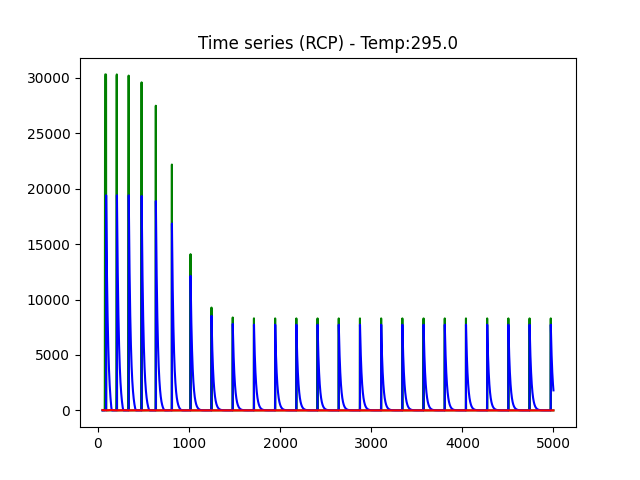

<IPython.core.display.Javascript object>


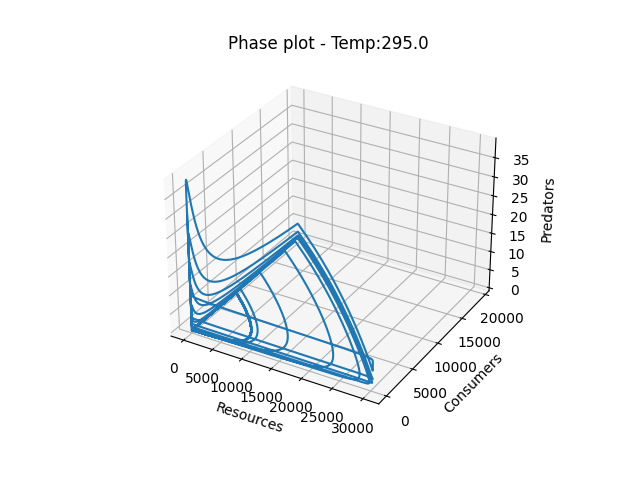

295.0
31.699562127992976


<IPython.core.display.Javascript object>


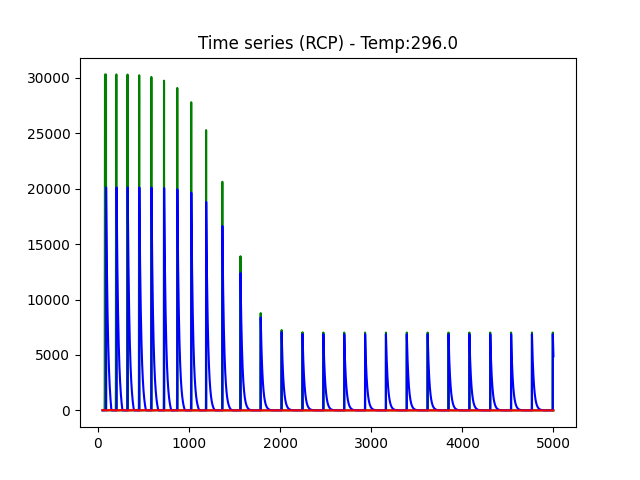

<IPython.core.display.Javascript object>


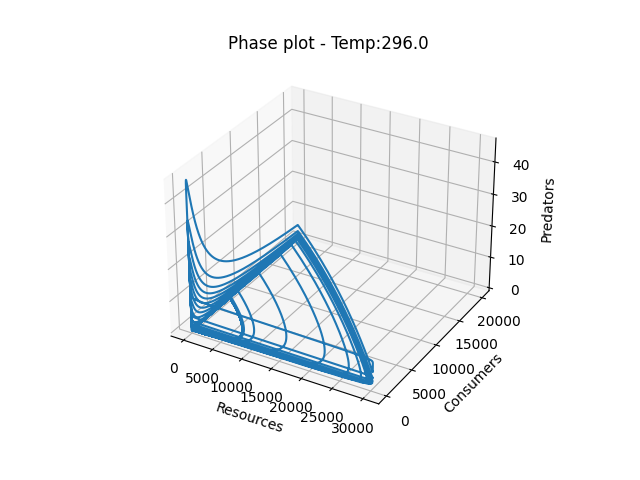

296.0
65.27612908999436


<IPython.core.display.Javascript object>


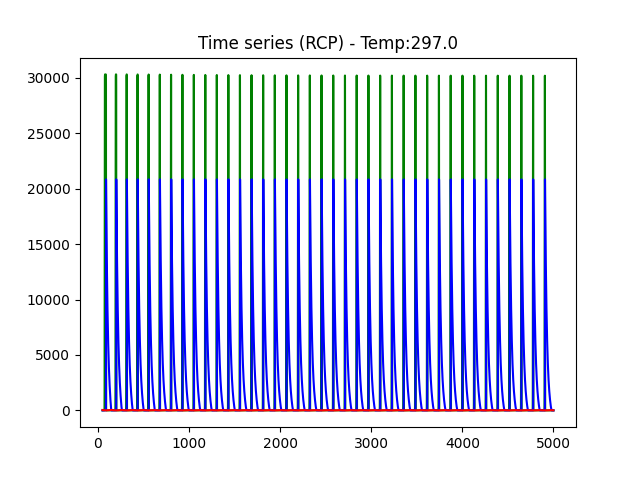

<IPython.core.display.Javascript object>


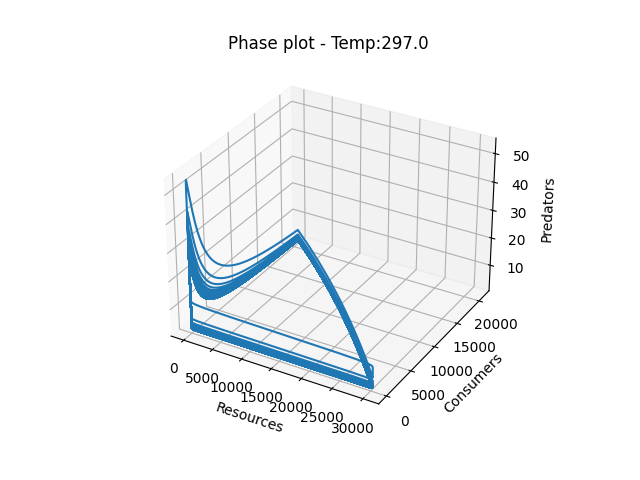

297.0
74.83421768501285


<IPython.core.display.Javascript object>


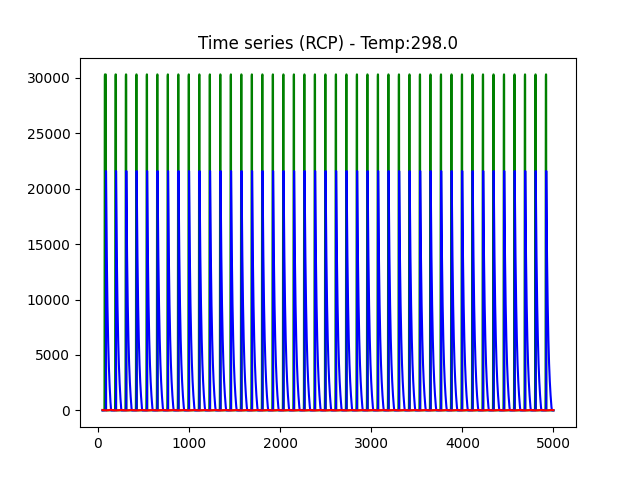

<IPython.core.display.Javascript object>


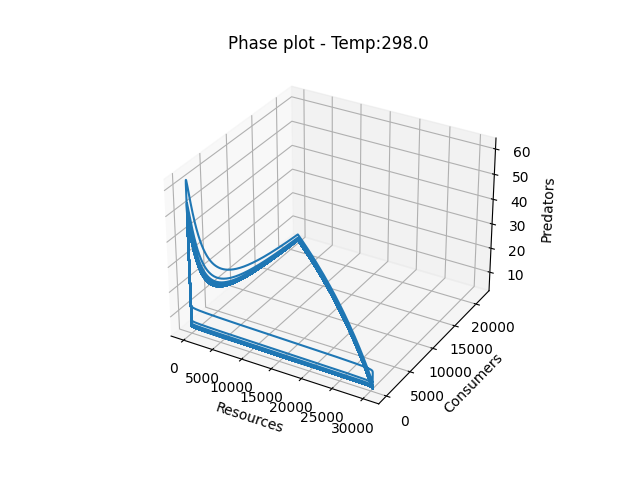

298.0
81.13753846398322


<IPython.core.display.Javascript object>


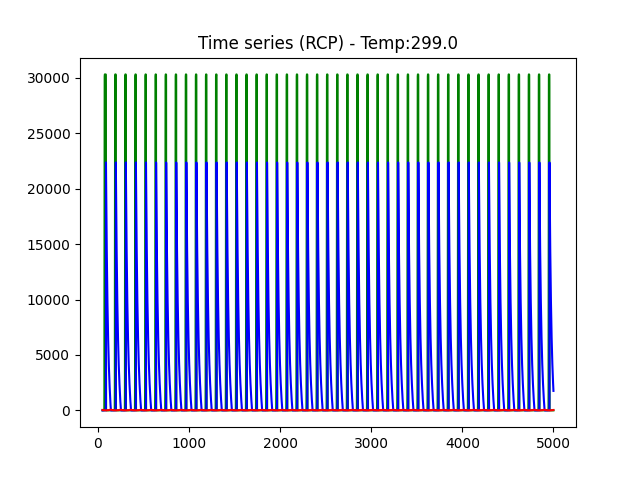

<IPython.core.display.Javascript object>


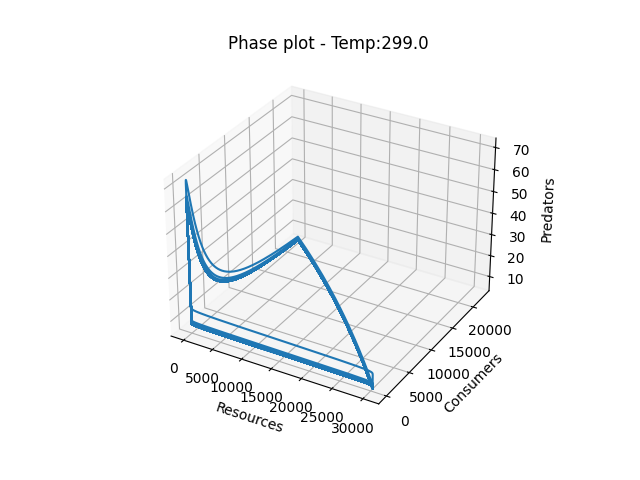

299.0
86.63049090499408


<IPython.core.display.Javascript object>


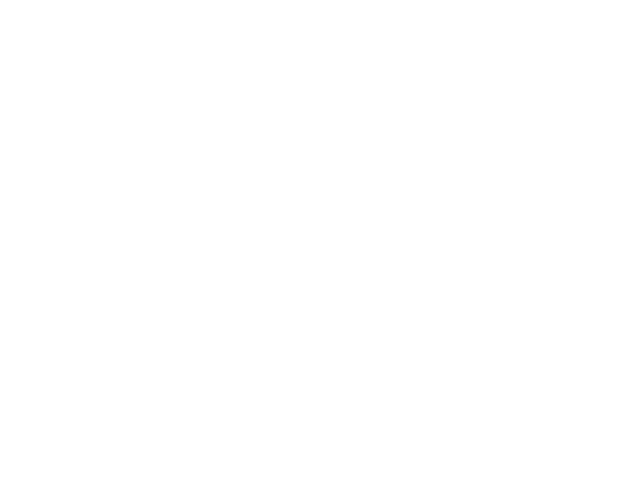

<IPython.core.display.Javascript object>


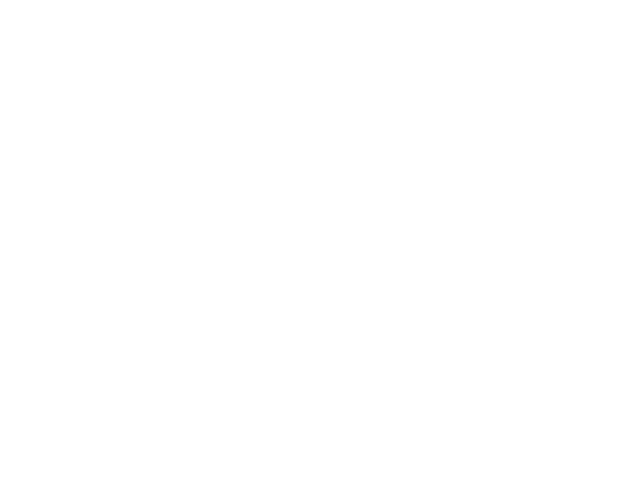

300.0
90.93392393700196


<IPython.core.display.Javascript object>


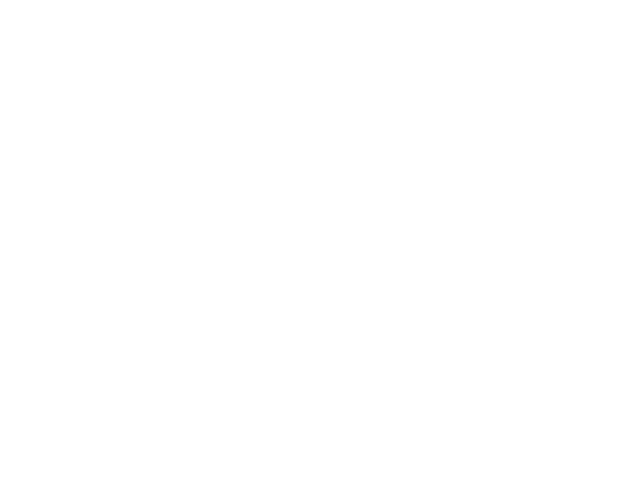

<IPython.core.display.Javascript object>


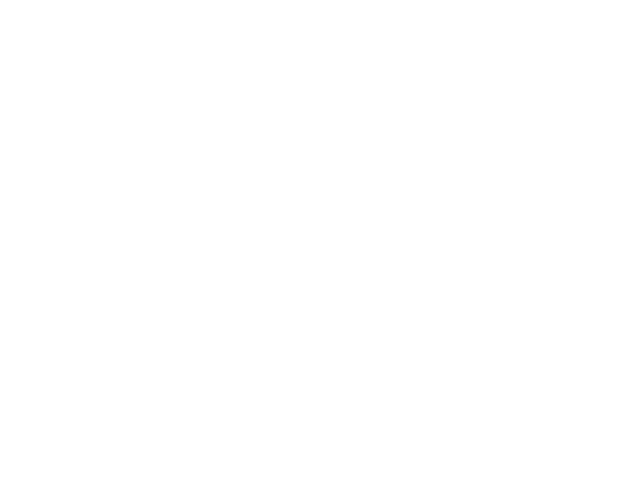

301.0
93.95883295699605


<IPython.core.display.Javascript object>


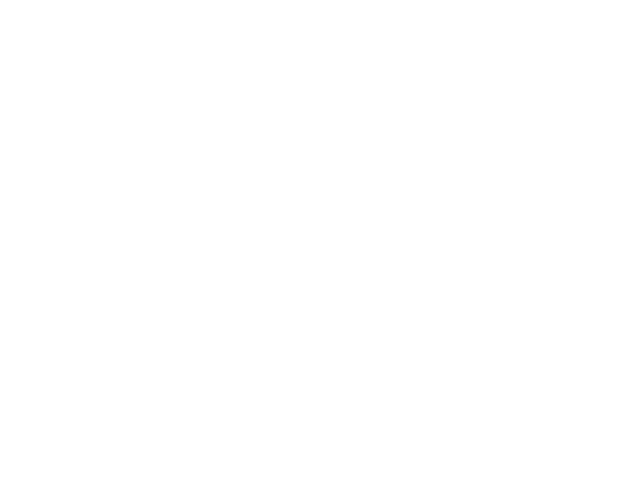

<IPython.core.display.Javascript object>


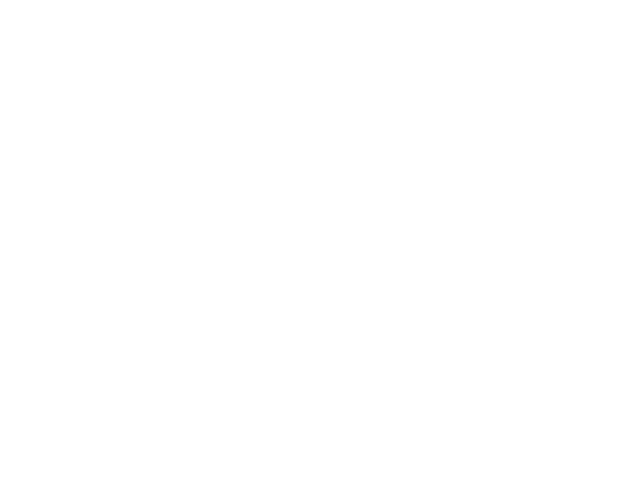

302.0
97.55456283298554


<IPython.core.display.Javascript object>


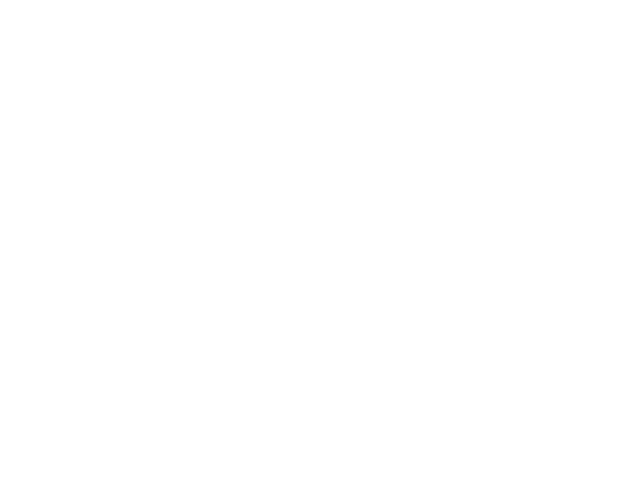

<IPython.core.display.Javascript object>


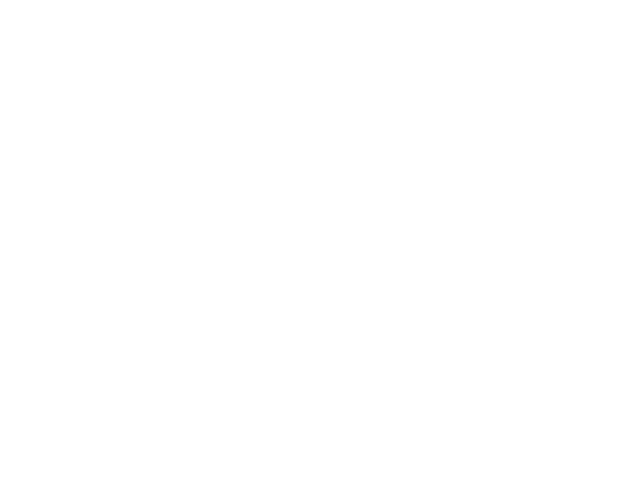

303.0
99.51598469400778


<IPython.core.display.Javascript object>


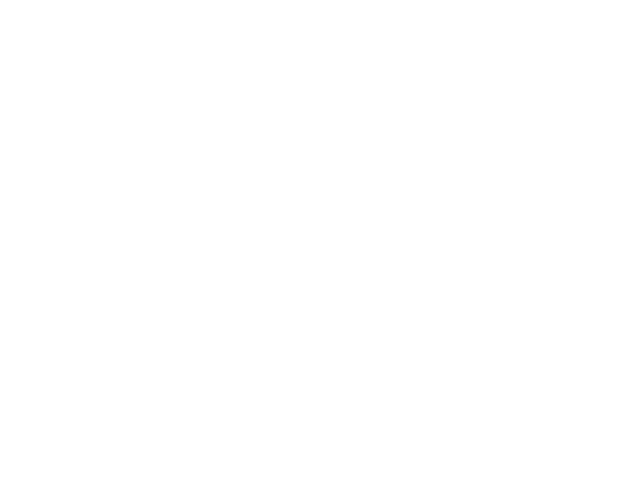

<IPython.core.display.Javascript object>


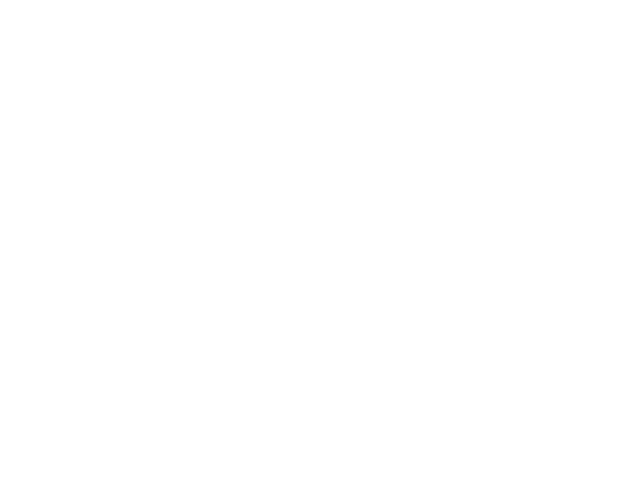

304.0
104.10329358500894


/tmp/ipykernel_27788/648855719.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1 = plt.figure()


<IPython.core.display.Javascript object>


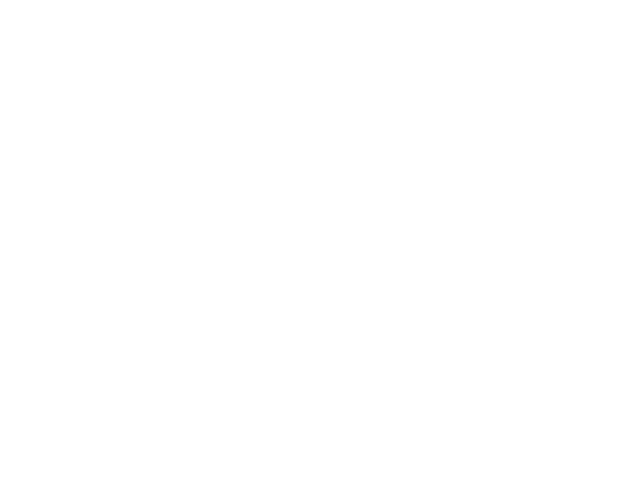

<IPython.core.display.Javascript object>


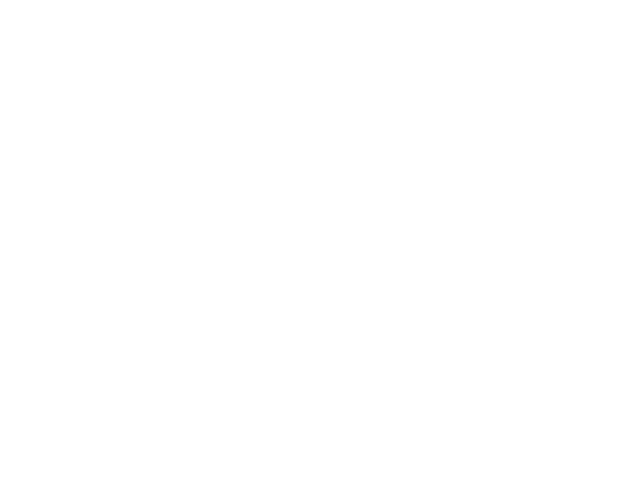

305.0


In [188]:
for i in tmp:
    flnm = "/home/karthik/thermo_Trophics/phase_" + str(i) + ".png"
    plnm = "/home/karthik/thermo_Trophics/ts_" + str(i) + ".png"
    fig_title = "Phase plot - Temp:" + str(i)
    plt_title = "Time series (RCP) - Temp:" + str(i)
    
    
    r0 = frT2(i); q0 = (1/30000)
    aC0 = faCT2(i); eC0 = feCT2(i); mC0 = 0.05; hC0 = 0.1
    aP0 = faPT2(i); eP0 = fePT2(i); mP0 = 0.05; hP0 = 0.5 
    
    u0 = np.array([8000, 900, 32, 0])

    p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
    p = np.around(p, 6)
    
    tend = 5000
    t_span = (0, tend)
    tint = np.linspace(0, tend, tend*100)
    
    start_time = timeit.default_timer()
    sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-14, atol=1e-14)
    print(timeit.default_timer() - start_time)
    
    ssv = sl2.y[:,5000:]
    np.shape(ssv)
    tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1,1,1)
    ax1.plot( tm, R, color = 'green')
    ax1.plot( tm, C, color = 'blue')
    ax1.plot( tm, P, color = 'red')
    ax1.set_title(plt_title)
    fig1.savefig(plnm)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.plot(R, C, P)
    ax.set_xlabel("Resources") ; ax.set_ylabel("Consumers"); ax.set_zlabel("Predators");
    ax.set_title(fig_title)
    fig.savefig(flnm)
    
    print(i)

    

<IPython.core.display.Javascript object>


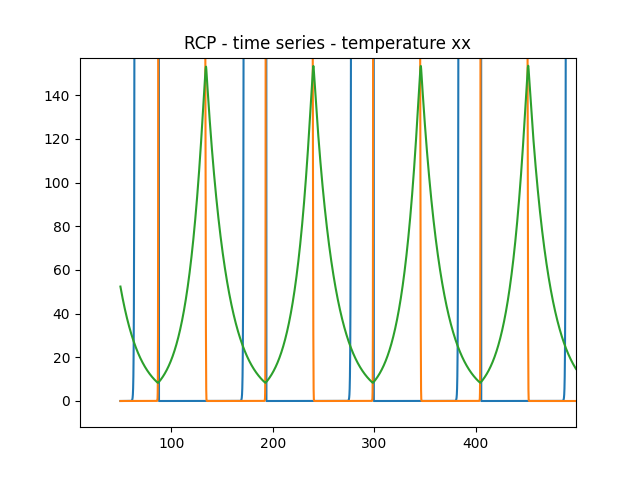

Text(0.5, 1.0, 'RCP - time series - temperature xx')

In [189]:
%matplotlib notebook
plt.plot( tm, R)
plt.plot( tm, C)
plt.plot( tm, P)
plt.title("RCP - time series - temperature xx")
#plt.savefig('test.png')

# Non-stationary condition <br>
* Temperature changes from 295K to 305K 


In [190]:
def RCP_temp (t, u, ct, mt, r1, q1, aC1, eC1, hC1, mC1, aP1, eP1, mP1, hP1):

    Tt= ct + mt*t
    
    r1 = np.around(frT2(Tt),6); 
    aC1 = np.around(faCT2(Tt),6); aP1 = np.around(faPT2(Tt),6);
    eC1 = np.around(feCT2(Tt),6); eP1 = np.around(fePT2(Tt),6);
    
    p0 = (t, Tt, r1, q1, aC1, eC1, hC1, mC1, aP1, eP1, mP1, hP1)
    #print(p0)
    
    du = np.zeros([4, 1])
    
    #variables
    R = u[0]
    C = u[1]
    P = u[2]
    
    du[0] = r1*R*(1 - (R*q1)) - (aC1*R*C)/(1 + (aC1*hC1*R))
    du[1] = (eC1*aC1*R*C)/(1 + (aC1*hC1*R)) - (aP1*C*P)/(1+ (aP1*hP1*C)) - mC1*C
    du[2] = (eP1*aP1*C*P)/(1+ (aP1*hP1*C)) - mP1*P
    du[3] = 1
    
    
    
    du = du.reshape(4,)
    
    return(du)

In [202]:
r0 = 2.5; q0 = (1/30000)
aC0 = 0.05; eC0 = 0.65; mC0 = 0.05; hC0 = 0.1
aP0 = 0.05; eP0 = 0.05; mP0 = 0.05; hP0 = 0.5 

u0 = np.array([8000, 900, 32])

tend = 5000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)
    
tr = 10/tend;

u0 = np.array([8000, 900, 32, 0])

p = (tmp[2], tr, r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)

start_time = timeit.default_timer()
sol1 = solve_ivp (RCP_temp, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-14, atol=1e-14)
print(timeit.default_timer() - start_time)



470.21256435499527


In [203]:
ssv1 = sol1.y[:,50:]
print(np.shape(ssv1))
print(np.shape(sol1.y))

(4, 499950)
(4, 500000)


In [204]:
tm1 = ssv1[3]; R1 = ssv1[0]; C1 = ssv1[1]; P1 = ssv1[2]

<IPython.core.display.Javascript object>


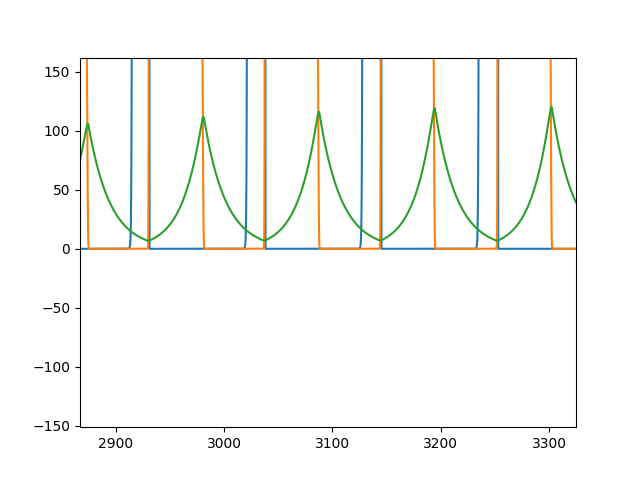

In [205]:

%matplotlib notebook
plt.plot( tm1, R1)
plt.plot( tm1, C1)
plt.plot( tm1, P1)

<IPython.core.display.Javascript object>


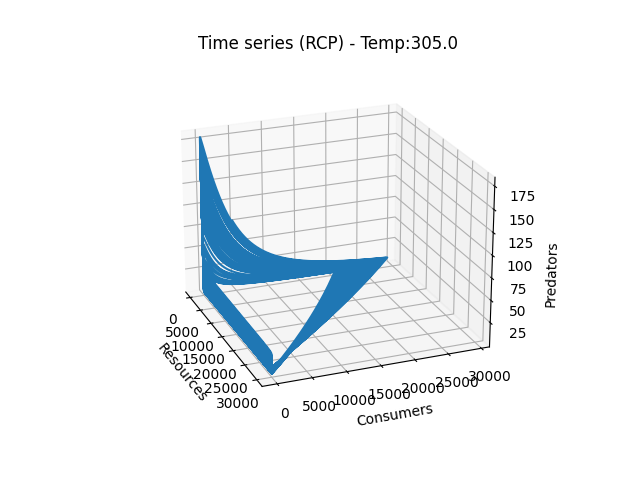

Text(0.5, 0.92, 'Time series (RCP) - Temp:305.0')

In [206]:
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R1, C1, P1)
ax.set_xlabel("Resources") ; ax.set_ylabel("Consumers"); ax.set_zlabel("Predators");
ax.set_title(plt_title)
#fig.savefig(flnm)


<IPython.core.display.Javascript object>


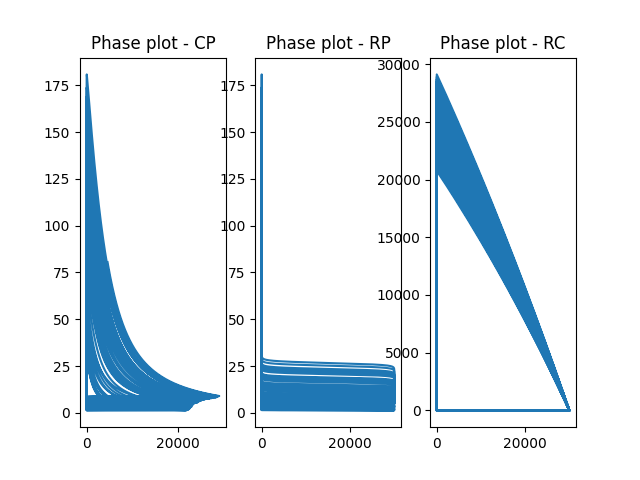

Text(0.5, 1.0, 'Phase plot - RC')

In [208]:
fig = plt.figure()
ax = fig.add_subplot(1,3,1)
ax.plot(C1, P1)
ax.set_title("Phase plot - CP")

ax = fig.add_subplot(1,3,2)
ax.plot(R1, P1)
ax.set_title("Phase plot - RP")

ax = fig.add_subplot(1,3,3)
ax.plot(R1, C1)
ax.set_title("Phase plot - RC")